In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
medins=pd.read_csv("D:/insurance.csv")
medins.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [2]:
medins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
#univariet analysis 
medins.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
medins.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
medins.duplicated().sum()

1

In [6]:
medins.drop_duplicates()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [7]:
medins["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
medins["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
medins["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
medins.corr()["charges"]

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [11]:
#bivariate analysis
px.scatter(medins, x="bmi", y="charges", title="charges of medical insurrance by bmi")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

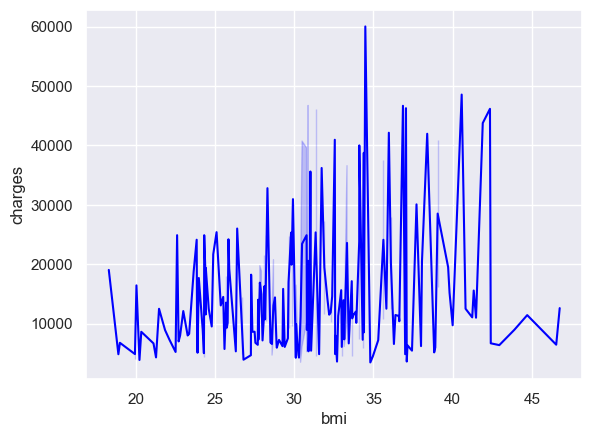

In [12]:
sns.lineplot(x="bmi",y="charges", data= medins[(medins.children>2)], color="blue")

In [13]:
px.scatter(medins, x="bmi",y="charges", color="sex")

<AxesSubplot:xlabel='age', ylabel='charges'>

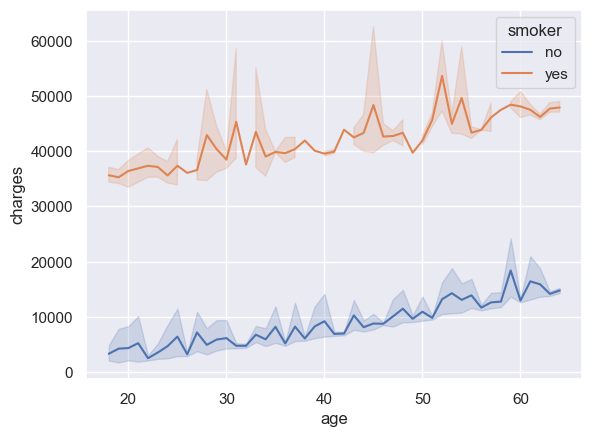

In [14]:
sns.lineplot(x="age",y="charges", data= medins[(medins.bmi>30)], color="blue", hue="smoker")

<AxesSubplot:xlabel='age', ylabel='charges'>

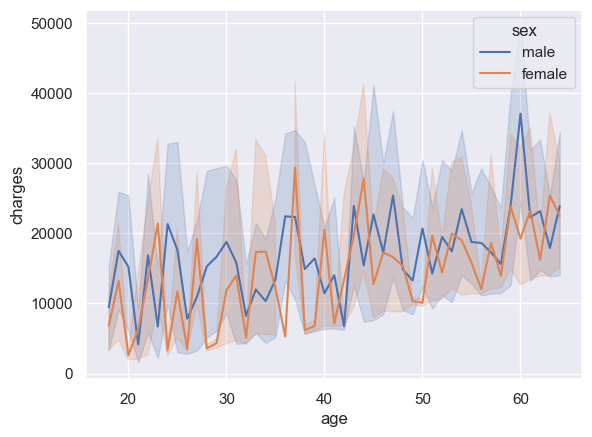

In [15]:
sns.lineplot(x="age",y="charges", data= medins[(medins.bmi>30)], color="blue", hue="sex")

<AxesSubplot:xlabel='children', ylabel='charges'>

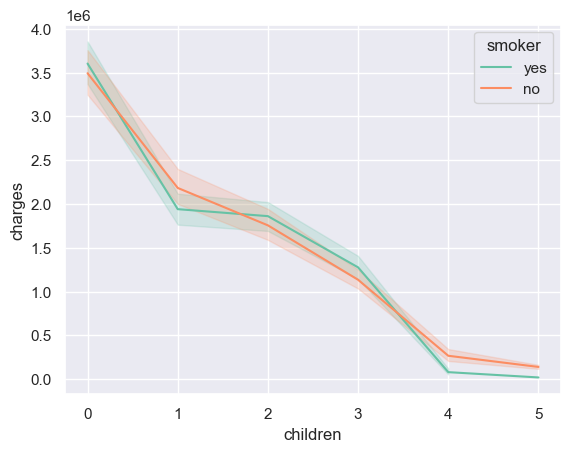

In [16]:
sns.lineplot(x="children",y="charges", data= medins, color="blue", hue="smoker", palette="Set2", estimator=np.sum)

In [17]:
fig=px.histogram(medins, x="region", y="charges", color="smoker", 
                title= "charges for region")
fig.show()

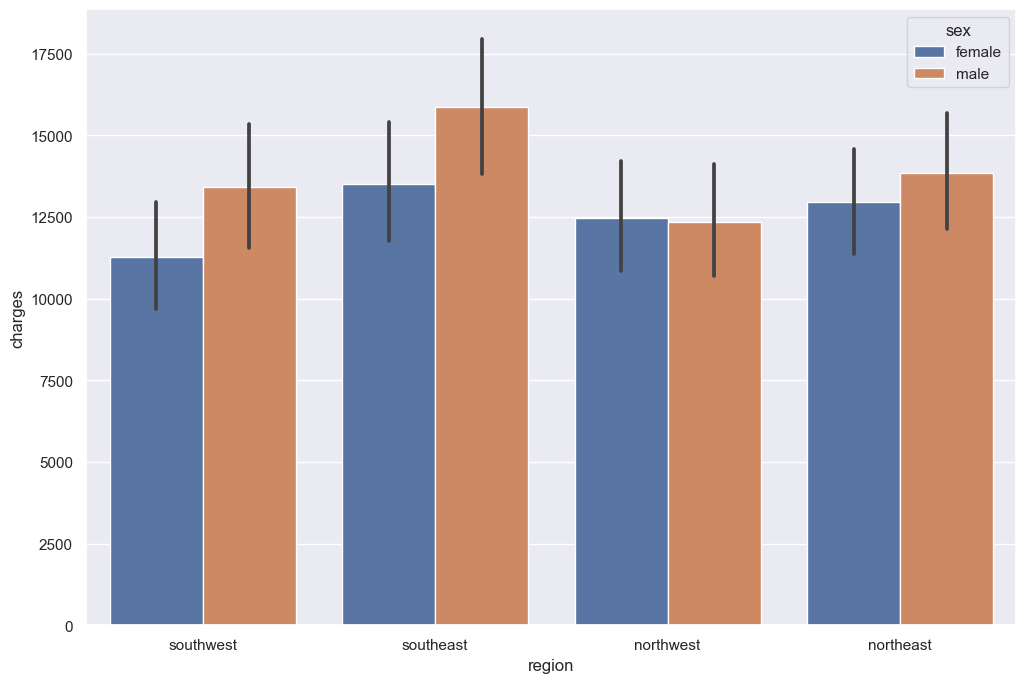

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax=sns.barplot( x="region", y="charges", hue="sex", data=medins)
plt.show()

In [19]:
data=medins[medins["region"]=="southeast"].groupby("sex")['charges'].sum()
px.bar(data, x=data.index, y='charges', title=' Total charges per sex in southwest')

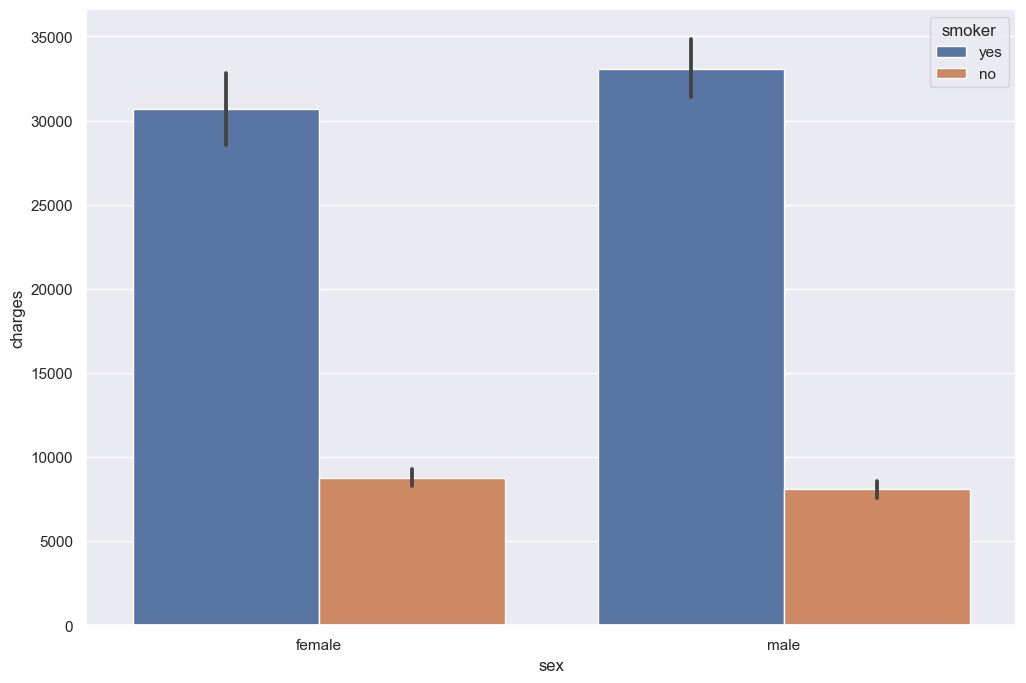

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax=sns.barplot( x="sex", y="charges", hue="smoker", data=medins)
plt.show()
 
 

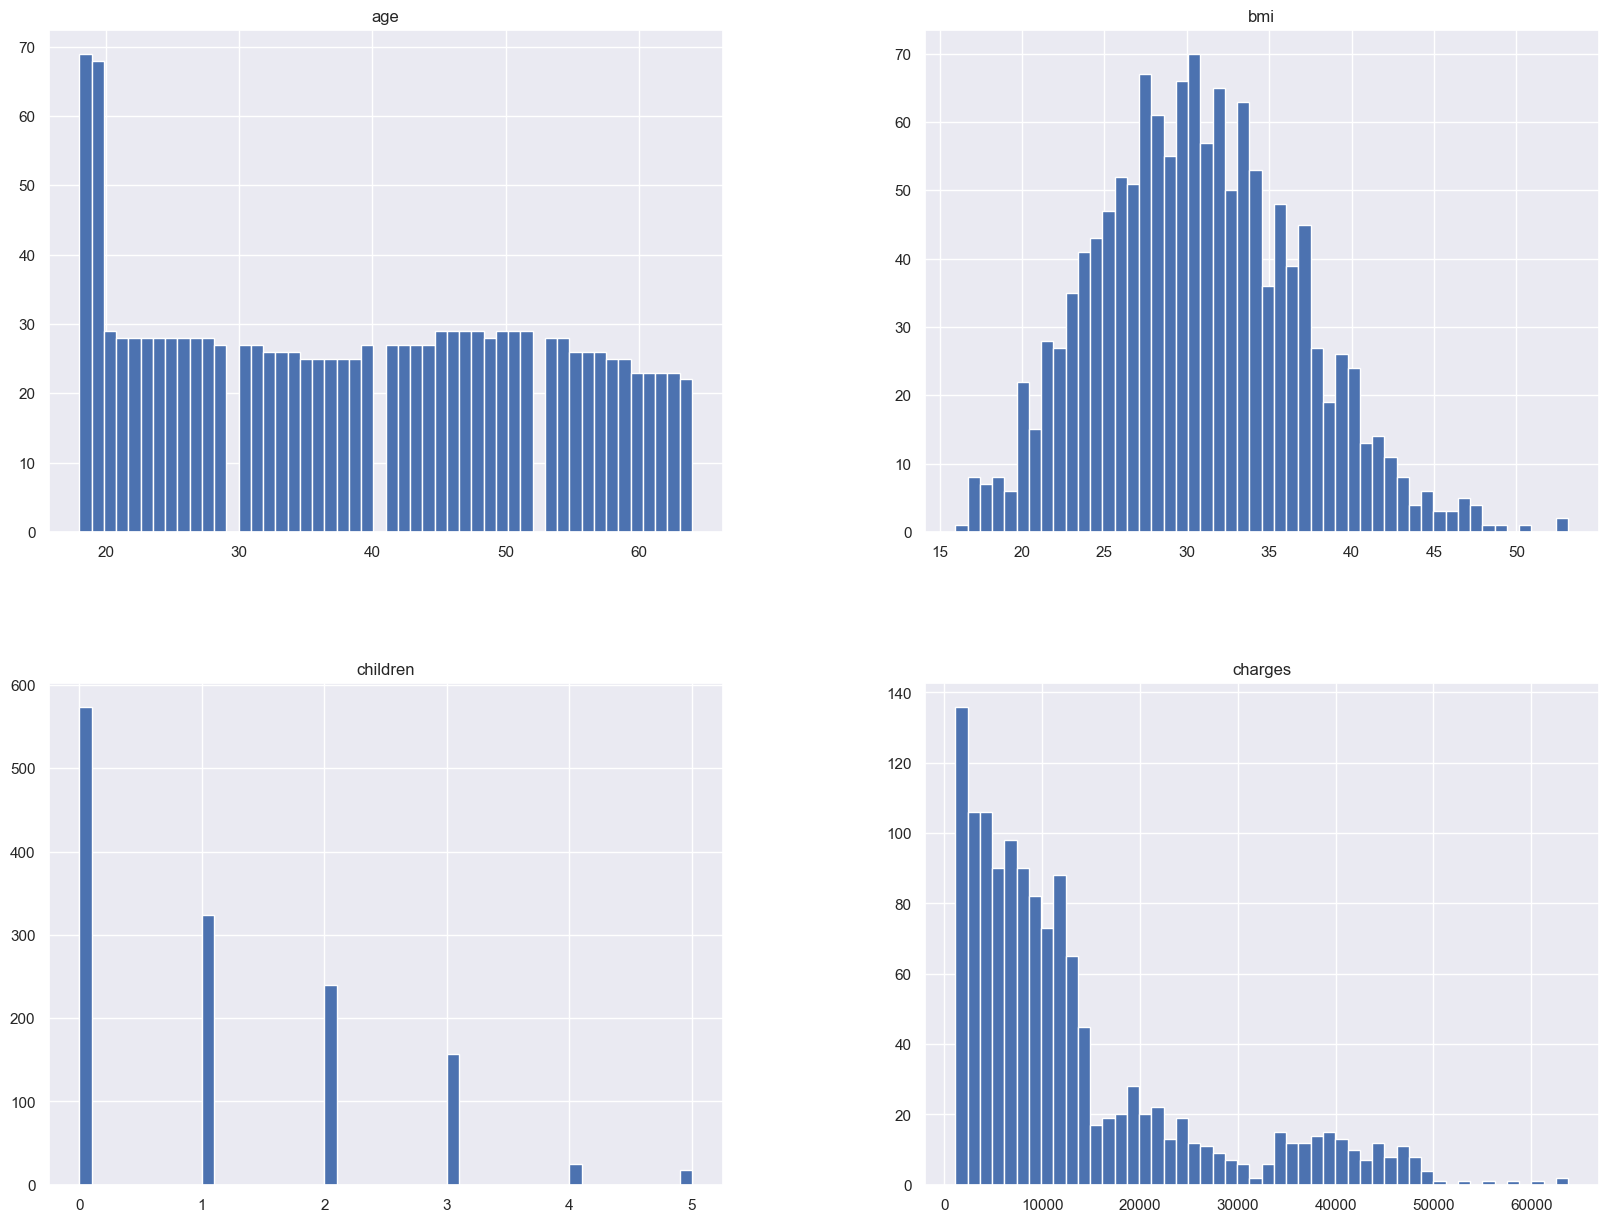

In [21]:
#cleaning for machine learning modelling 

medins.hist(bins=50, figsize=(20,15));
plt.show()

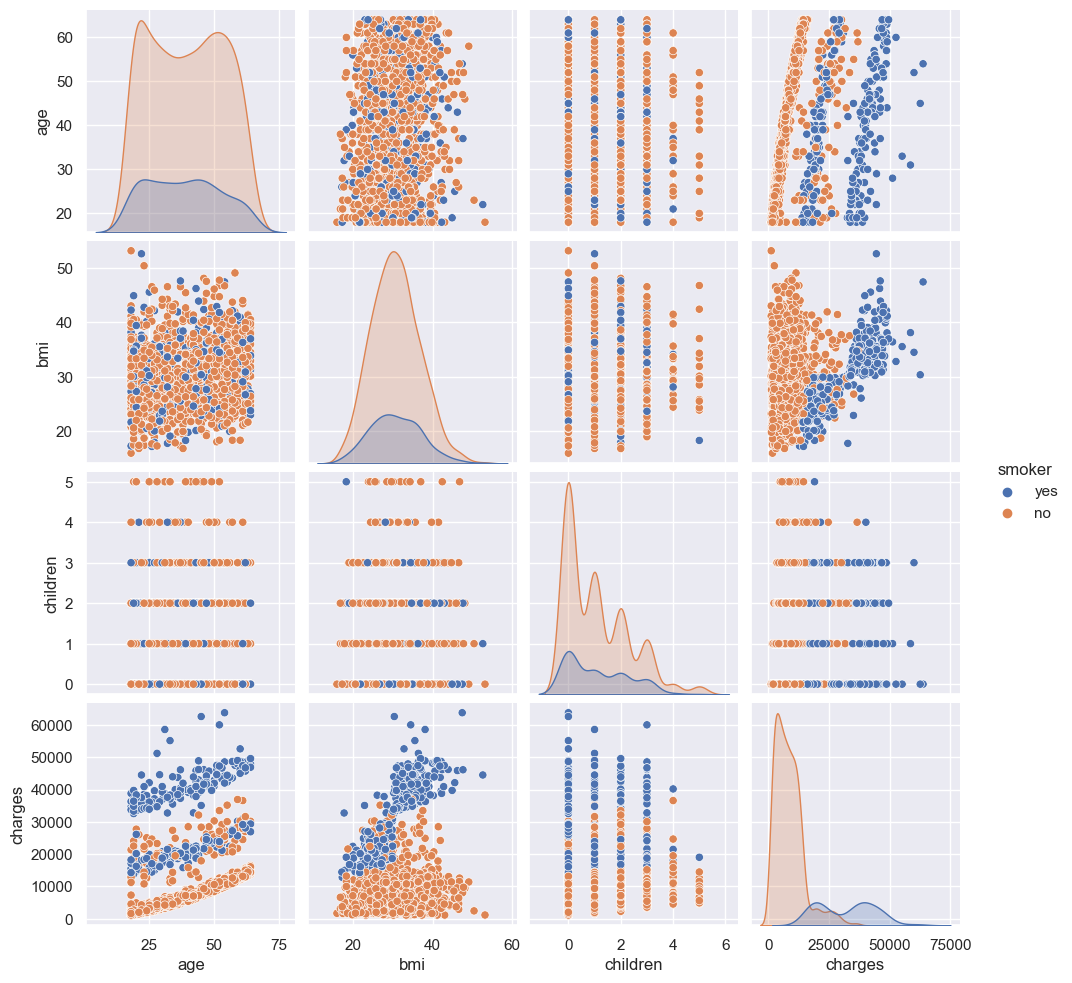

In [22]:
sns.pairplot(medins, hue="smoker")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(medins ,test_size=0.2, random_state=42)

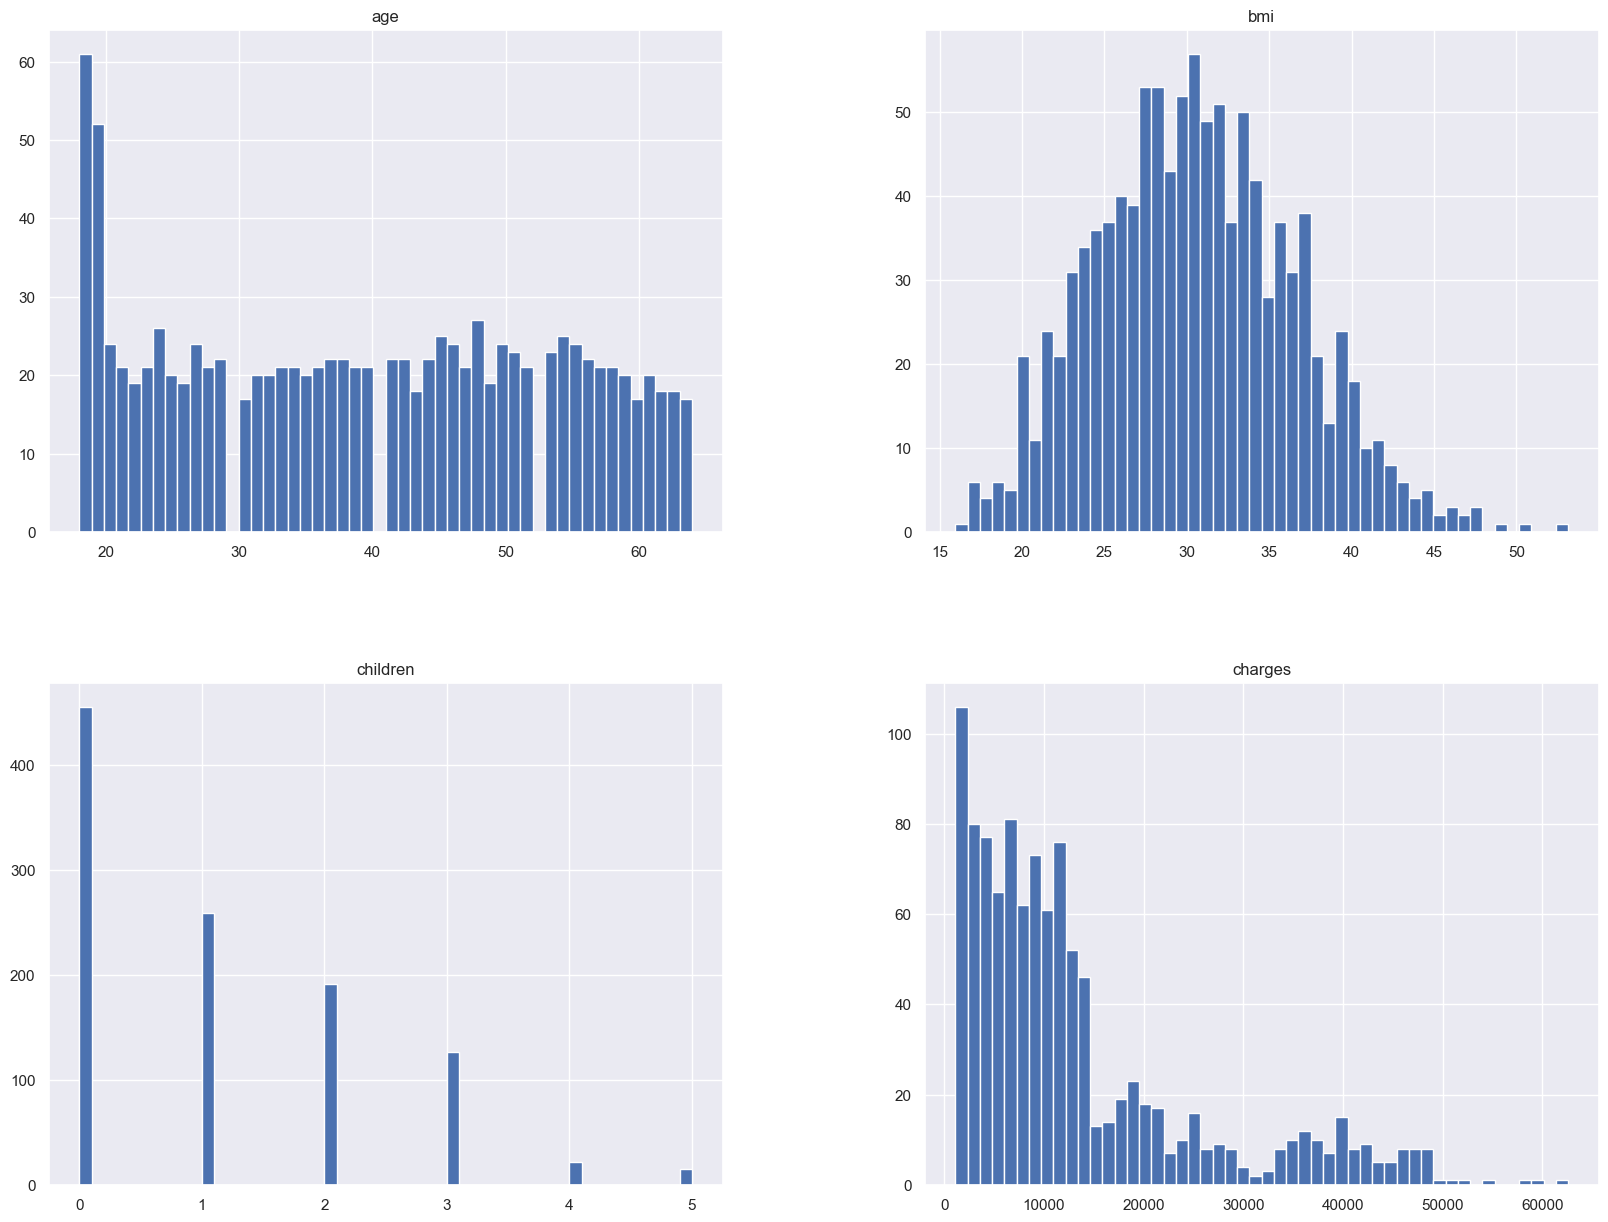

In [24]:
train_set.hist(bins=50, figsize=(20,15));
plt.show()

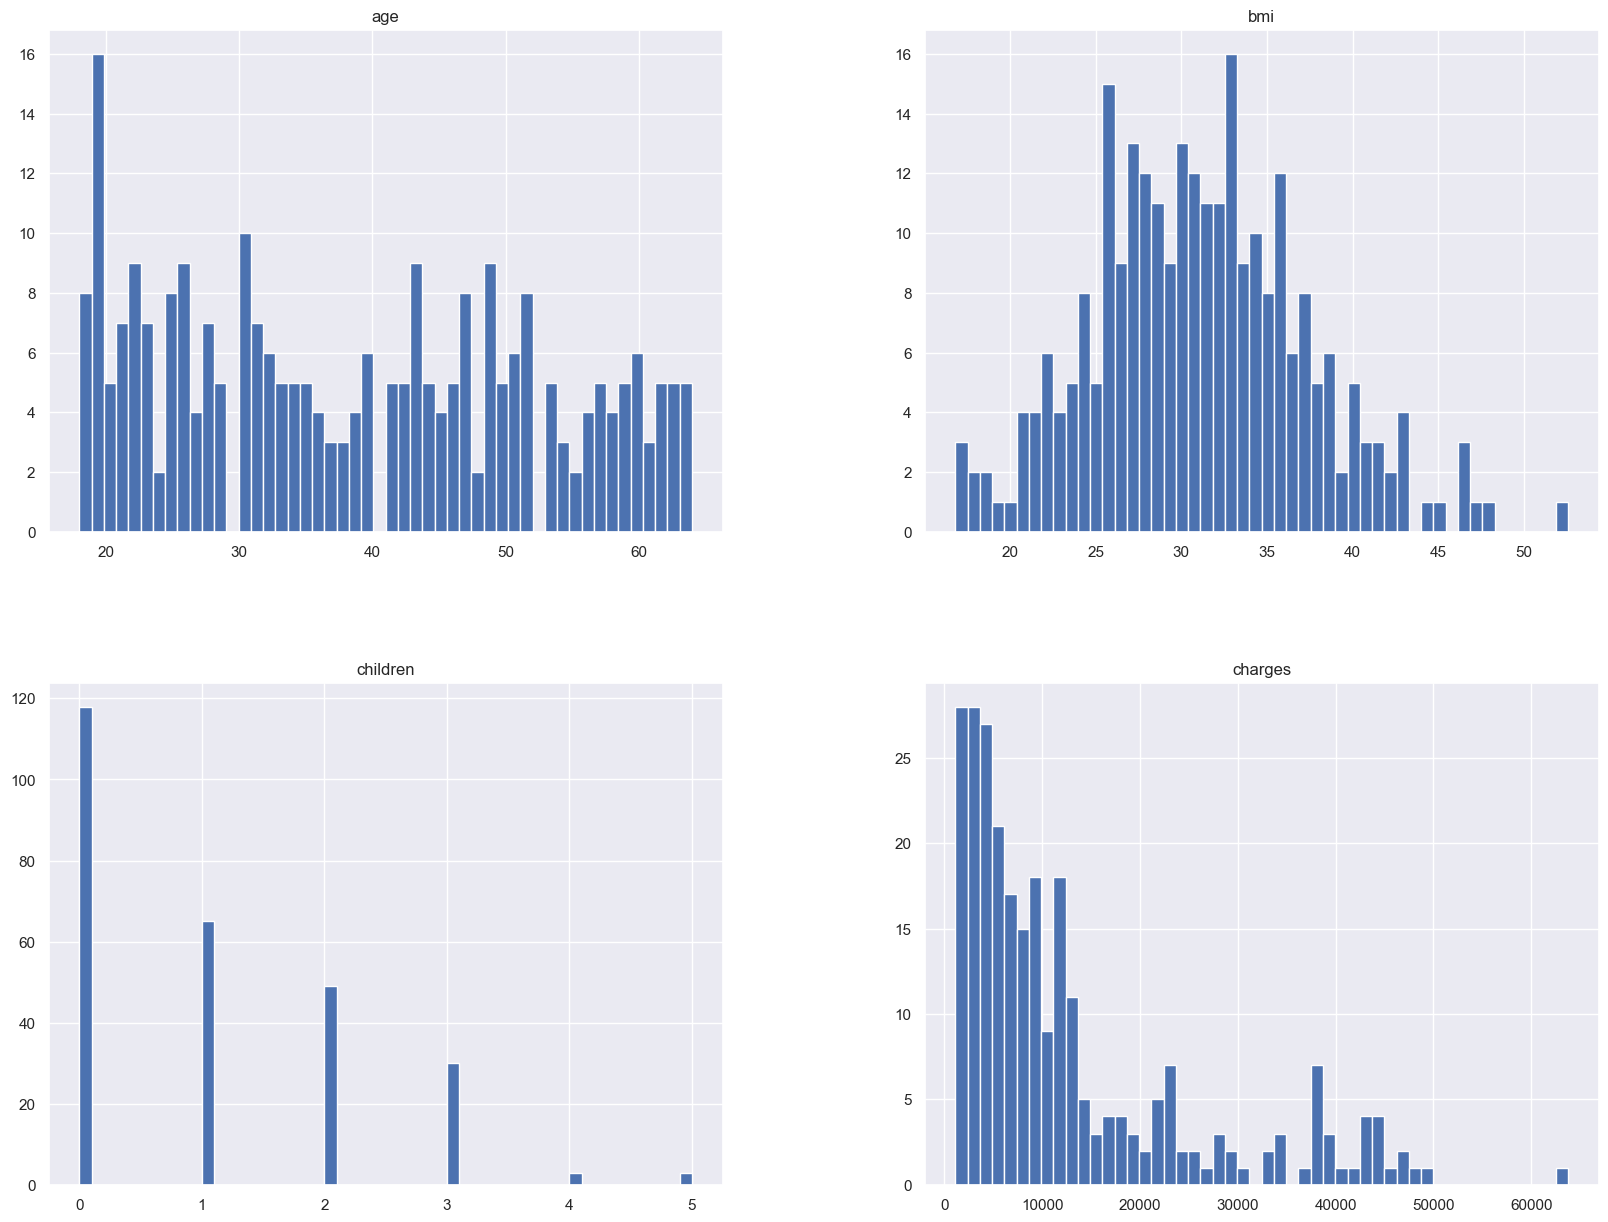

In [25]:
test_set.hist(bins=50, figsize=(20,15));
plt.show()

In [26]:
train_set.corr()["charges"]

age         0.281721
bmi         0.197316
children    0.071885
charges     1.000000
Name: charges, dtype: float64

In [42]:
train_featuers= train_set.drop(["charges","sex","region"], axis=1)
train_labels=train_set["charges"].copy()
#num training data 
medins_num=train_featuers.drop(["sex","region","smoker"], axis=1)


KeyError: "['sex', 'region'] not found in axis"

In [ ]:
#cat_data
medins_cat=train_featuers[["sex","region","smoker"]]
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse=False)
medins_cat_hot=cat_encoder.fit_transform(medins_cat)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_st=StandardScaler()
scaled_medins_num=scaler_st.fit_transform(medins_num)

In [ ]:
 from sklearn.pipeline import make_pipeline
medins_num_pip=make_pipeline=StandardScaler()
medins_num_pip.fit_transform(medins_num)

In [ ]:
#full_pipeline using make_columntransformer
from sklearn.compose import make_column_transformer
num_attribs=list(medins_num)
cat_attribs=["smoker","region", "sex"]
full_pipeline= make_column_transformer((medins_num_pip, num_attribs),(OneHotEncoder(sparse=False, drop="first"), cat_attribs))

In [ ]:
transform_train_medins= full_pipeline.fit_transform(train_featuers)
transform_train_medins.shape

In [ ]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(transform_train_medins, train_labels)
print("lin reg intercept", lin_reg.intercept_)
print("lin reg coeff", lin_reg.coef_)


In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
test_featuers=test_set.drop("charges", axis=1)
test_labels= test_set["charges"].copy()
medins_test_featuers= full_pipeline.transform(test_featuers)
medins_test_pred=lin_reg.predict(medins_test_featuers)
print("test.linear.regression.accuracy",r2_score(test_labels,medins_test_pred))
print("mean squared error", mean_squared_error(test_labels,medins_test_pred))
print("mean absolute error", mean_absolute_error(test_labels,medins_test_pred))
 

test.linear.regression.accuracy 0.7835929767120722
mean squared error 33596915.85136149
mean absolute error 4181.194473753653


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_reg= Pipeline([("poly", PolynomialFeatures(degree=2)), ("lin_reg",LinearRegression())])
poly_reg.fit(transform_train_medins, train_labels)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [46]:
medins_test_pred=poly_reg.predict(medins_test_featuers)
print("r2",r2_score(test_labels,medins_test_pred))
print("mean squared error", mean_squared_error(test_labels,medins_test_pred))
print("mean absolute error", mean_absolute_error(test_labels,medins_test_pred))
 

r2 0.8665830903164841
mean squared error 20712805.987918366
mean absolute error 2729.500133639448


In [47]:
#grid search for best polynomial featuers
from sklearn.model_selection import GridSearchCV

param_grid = {"poly__degree": [2,3,4,5]}
grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring="r2")
grid_search.fit(transform_train_medins, train_labels)

grid_search.best_params_ 

{'poly__degree': 2}

In [48]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1)
ridge_reg.fit(transform_train_medins, train_labels)
medins_test_pred=ridge_reg.predict(medins_test_featuers)

print("r2",r2_score(test_labels,medins_test_pred))
print("mean squared error", mean_squared_error(test_labels,medins_test_pred))
print("mean absolute error", mean_absolute_error(test_labels,medins_test_pred))
 

r2 0.7832807188145147
mean squared error 33645393.493855566
mean absolute error 4193.195352935272


In [49]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=1)
lasso_reg.fit(transform_train_medins, train_labels)
medins_test_pred=ridge_reg.predict(medins_test_featuers)

print("r2",r2_score(test_labels,medins_test_pred))
print("mean squared error", mean_squared_error(test_labels,medins_test_pred))
print("mean absolute error", mean_absolute_error(test_labels,medins_test_pred))

r2 0.7832807188145147
mean squared error 33645393.493855566
mean absolute error 4193.195352935272


In [50]:
poly_reg=Pipeline([("poly", PolynomialFeatures(degree=2)), ("ridge_reg", Ridge(alpha=1))])
poly_reg.fit(transform_train_medins, train_labels)
medins_test_pred=poly_reg.predict(medins_test_featuers)
print("r2",r2_score(test_labels,medins_test_pred))
print("mean squared error", mean_squared_error(test_labels,medins_test_pred))
print("mean absolute error", mean_absolute_error(test_labels,medins_test_pred))


r2 0.8666357578372919
mean squared error 20704629.422122136
mean absolute error 2738.7575257621793


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {"poly__degree": [2,3,4,5], "ridge_reg__alpha":[0.1,1, 10, 100, 1000]}
grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring="r2")
grid_search.fit(transform_train_medins, train_labels)

grid_search.best_params_ 

{'poly__degree': 2, 'ridge_reg__alpha': 1}

In [52]:
import joblib
joblib.dump(poly_reg,"poly_reg_model")
poly_reg= joblib.load("poly_reg_model")


In [53]:
import joblib
joblib.dump(full_pipeline,"pfull_pipeline")
 

['pfull_pipeline']

In [71]:
%%writefile medinsurance.py

import streamlit as st
import numpy as np
import pandas as pd
import joblib
poly_reg= joblib.load("poly_reg_model")
pfull_pipeline=joblib.load("pfull_pipeline")

medins=pd.read_csv("D:/insurance.csv")
medins=medins.rename(columns={'age':"age", 'sex':'sex',
                              'bmi':"bmi", "children":"children","region": "region", "smoker":"smoker"})
st.title("prediction of medical insurance charges")
st.write("""this is app predics the insurance charges""")

children=st.slider("children", float(medins["children"].min()),float(medins["children"].max()))
age=st.slider("age", float(medins["age"].min()),float(medins["age"].max()))
bmi=st.slider("bmi", float(medins["bmi"].min()),float(medins["bmi"].max()))
region= st.selectbox("region",("southeast","southwest","northwest", "northeast"))
sex= st.selectbox("sex",("male","female"))
smoker= st.selectbox("smoker",("yes","no"))
#dict
user_data={"children":children, "age":age,"bmi":bmi, "region":region,"sex":sex,"smoker":smoker}

inspara=pd.DataFrame(user_data, index=[0])
inspara_ready=pfull_pipeline.transform(inspara)
#predict_model
medins_predictions=poly_reg.predict(inspara_ready)
#display
st.markdown("""# $ {} """.format(medins_predictions))
 

Overwriting medinsurance.py


In [ ]:
!streamlit run medinsurance.py